In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import sklearn
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

In [2]:
train = pd.read_csv('Train_Plant1_added_features_min_max.csv')

In [3]:
len(train[train['ARTIFICIAL']==1])/len(train)

0.05437791375291375

In [4]:
train['DATE_TIME'] = pd.to_datetime(train['DATE_TIME'])
train["HOUR"] = train['DATE_TIME'].dt.hour
train["MINUTE"] = train['DATE_TIME'].dt.minute
train["DAY_OF_YEAR"] = train['DATE_TIME'].dt.dayofyear
train["NIGHT"] = [1 if i == 0 else 1 for i in train['IRRADIATION']]
#'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1'
train[train['NIGHT']==1]

,Unnamed: 0,Unnamed: 0.1,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_ID,DC_POWER,AC_POWER,...,DC_DIF_AVG_PER_INVERTER_PER_DAY,AC_DIF_AVG_PER_INVERTER_PER_DAY,DC_AVG_DIF_PER_DAY,AC_AVG_DIF_PER_DAY,DC_DIF_AVG_PER_MOMENT,AC_DIF_AVG_PER_MOMENT,HOUR,MINUTE,DAY_OF_YEAR,NIGHT
0,0,0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.031426,-0.565960,-0.74543,4135001.0,0.0,-0.754537,...,-0.601756,-0.603171,-0.653748,-0.655007,6.146126e-17,-1.995403e-17,0,0,136,1
1,1,1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.031426,-0.565960,-0.74543,4135001.0,0.0,-0.754537,...,-0.662024,-0.663281,-0.653748,-0.655007,6.146126e-17,-1.995403e-17,0,0,136,1
2,2,2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.031426,-0.565960,-0.74543,4135001.0,0.0,-0.754537,...,-0.651426,-0.652666,-0.653748,-0.655007,6.146126e-17,-1.995403e-17,0,0,136,1
3,3,3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.031426,-0.565960,-0.74543,4135001.0,0.0,-0.754537,...,-0.640795,-0.642098,-0.653748,-0.655007,6.146126e-17,-1.995403e-17,0,0,136,1
4,4,4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.031426,-0.565960,-0.74543,4135001.0,0.0,-0.754537,...,-0.675116,-0.676298,-0.653748,-0.655007,6.146126e-17,-1.995403e-17,0,0,136,1
5,5,5,2020-05-15 00:00:00,VHMLBKoKgIrUVDU,0.031426,-0.565960,-0.74543,4135001.0,0.0,-0.754537,...,-0.651452,-0.652765,-0.653748,-0.655007,6.146126e-17,-1.995403e-17,0,0,136,1
6,6,6,2020-05-15 00:00:00,WRmjgnKYAwPKWDb,0.031426,-0.565960,-0.74543,4135001.0,0.0,-0.754537,...,-0.644088,-0.645346,-0.653748,-0.655007,6.146126e-17,-1.995403e-17,0,0,136,1
7,7,7,2020-05-15 00:00:00,YxYtjZvoooNbGkE,0.031426,-0.565960,-0.74543,0.0,0.0,-0.754537,...,-0.662176,-0.663482,-0.653748,-0.655007,6.146126e-17,-1.995403e-17,0,0,136,1
8,8,8,2020-05-15 00:00:00,ZnxXDlPa8U1GXgE,0.031426,-0.565960,-0.74543,4135001.0,0.0,-0.754537,...,-0.656595,-0.657869,-0.653748,-0.655007,6.146126e-17,-1.995403e-17,0,0,136,1
9,9,9,2020-05-15 00:00:00,ZoEaEvLYb1n2sOq,0.031426,-0.565960,-0.74543,4135001.0,0.0,-0.754537,...,-0.654905,-0.656182,-0.653748,-0.655007,6.146126e-17,-1.995403e-17,0,0,136,1


In [5]:
train.DAY_OF_YEAR.unique()

array([136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161],
      dtype=int64)

In [6]:
 train_columns = [
        'HOUR',
       'MINUTE',
       'DAY_OF_YEAR',
       'NIGHT',
       'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1',
       'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1',
       'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_1',
       'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1',
       'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'AC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_3',
       'AC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_3',
       'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3',
       'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3',
       'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_3']

In [7]:
train = train[train['ARTIFICIAL']==0]
y_train = train['DC_POWER']

In [8]:
train = train[train_columns]
pca = PCA(n_components=0.99)
pca.fit(train)
print('n_components',pca.n_components_)
X_train = pca.transform(train)

n_components 4


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#rf.fit(X_train,y_train)

In [10]:
#param_grid = {'max_depth':[2,3,4,5], 'n_estimators':[50,100,150]}
#grd_srch = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid,
#                       scoring='neg_root_mean_squared_error')
#grd_srch.fit(X_train,y_train)
#This takes something like 15 mins to run, but grid search showed best parameter was max depth 4 n_estimators 100

In [11]:
#best_params = grd_srch.best_params_
#best_params

In [12]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [13]:
rf.feature_importances_

array([0.02339054, 0.11003038, 0.09907812, 0.76750095])

In [14]:
test = pd.read_csv('Test_Plant1_added_features_min_max.csv')

In [15]:
test['DATE_TIME'] = pd.to_datetime(test['DATE_TIME'])
test["HOUR"] = test['DATE_TIME'].dt.hour
test["MINUTE"] = test['DATE_TIME'].dt.minute
test["DAY_OF_YEAR"] = test['DATE_TIME'].dt.dayofyear
test["NIGHT"] = [1 if i == 0 else 1 for i in test['IRRADIATION']]

In [16]:
X_test = test[train_columns]
X_test = pca.transform(X_test)
y_test = test['DC_POWER']

In [17]:
predictions = rf.predict(X_test)
np.max(predictions)

12316.848661420003

In [18]:
#from sklearn.metrics import mean_squared_error
print('RMSE', np.mean((y_test-predictions)**2)**0.5)
print('MAE', np.mean(np.abs(y_test-predictions)))
print('R2', r2_score(y_test, predictions))

RMSE 1812.2119404716034
MAE 1027.4779597391696
R2 0.7557783276892066


In [19]:
print(np.mean(y_test))
print(np.mean(predictions))

2778.3001809200423
3353.3063187453563


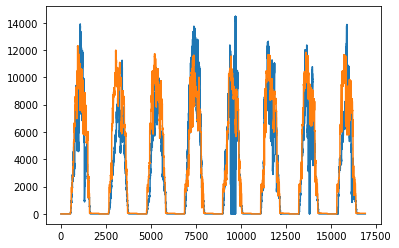

In [20]:
plt.figure()
plt.plot(y_test)
plt.plot(predictions)

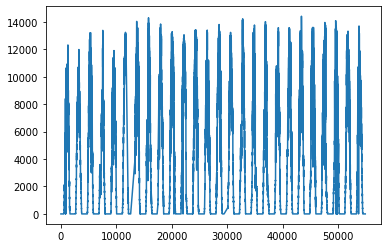

In [21]:
plt.figure()
plt.plot(y_train)

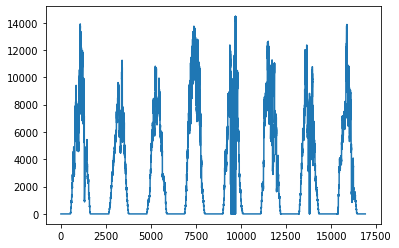

In [22]:
plt.figure()
plt.plot(y_test)

In [23]:
test['PREDICTIONS']=predictions

In [24]:
daily_y_test = test.groupby('DAY_OF_YEAR').sum()['DC_POWER']
daily_predictions = test.groupby('DAY_OF_YEAR').sum()['PREDICTIONS']

In [25]:
print('RMSE', np.mean((daily_y_test-daily_predictions)**2)**0.5)
print('MAE', np.mean(np.abs(daily_y_test-daily_predictions)))
print('R2', r2_score(daily_y_test, daily_predictions))

RMSE 1577774.6749354184
MAE 1453486.7975476023
R2 -3.204616495201461


In [26]:
daily_y_test

DAY_OF_YEAR
162    5.784040e+06
163    5.045679e+06
164    5.222354e+06
165    7.593776e+06
166    6.350495e+06
167    6.055536e+06
168    5.572501e+06
169    5.317780e+06
Name: DC_POWER, dtype: float64

In [27]:
daily_predictions

DAY_OF_YEAR
162    7.081264e+06
163    7.451690e+06
164    7.307232e+06
165    6.637481e+06
166    6.773057e+06
167    7.055339e+06
168    7.218666e+06
169    7.132735e+06
Name: PREDICTIONS, dtype: float64